<a href="https://colab.research.google.com/github/ll-cooool-j/DS-Assignment/blob/main/arima_forecasting_ver%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-b237078aa9ac>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


         Infected
Date             
0-07-01   4665433
0-07-02   4585028
0-07-03   4671221
0-07-04   4664489
0-07-05   4725279


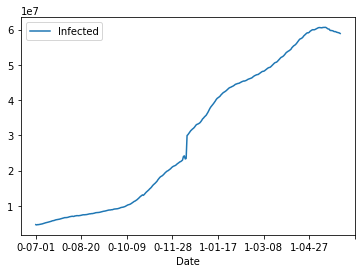

In [12]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Global%2C%20only%20Date%20and%20Infected%2C%20CSV%20formatted.csv', header=0, parse_dates=[0], index_col=0)
print(series.head())
series.plot()
pyplot.show()

<ipython-input-2-35562bad1226>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


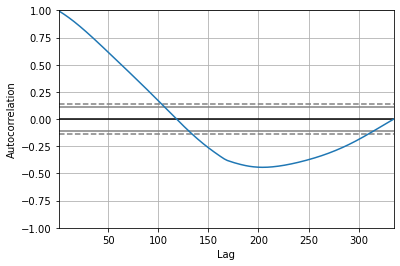

In [2]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Global%2C%20only%20Date%20and%20Infected%2C%20CSV%20formatted.csv', header=0, parse_dates=[0], index_col=0)
autocorrelation_plot(series['Infected'])
pyplot.show()

1/ This code below print the summary of the fit model

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

2/ This aslo help us get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

3/ Finally, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.



C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.Infected   No. Observations:                  334
Model:                ARIMA(15, 1, 0)   Log Likelihood               -4747.756
Method:                       css-mle   S.D. of innovations         360519.182
Date:                Thu, 08 Jul 2021   AIC                           9529.511
Time:                        22:53:10   BIC                           9594.300
Sample:                    07-02-2020   HQIC                          9555.344
                         - 05-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.624e+05   4.49e+04      3.620      0.000    7.45e+04     2.5e+05
ar.L1.D.Infected      0.0609      0.055      1.115      0.265      -0.046       0.168
ar.L2.D.Infected     -0.

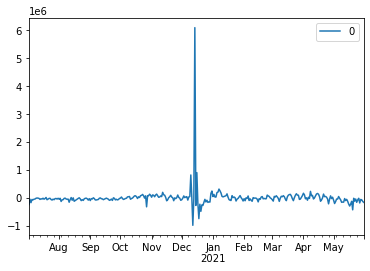

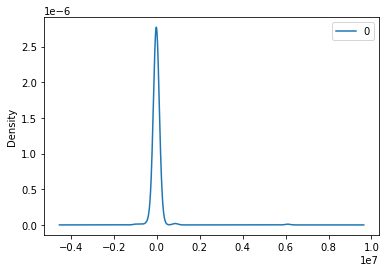

                  0
count  3.340000e+02
mean  -2.617044e+03
std    3.610837e+05
min   -9.870861e+05
25%   -6.813153e+04
50%   -2.302050e+04
75%    3.617045e+04
max    6.098578e+06


In [5]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# load datase
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Global%2C%20only%20Date%20and%20Infected%2C%20CSV%20formatted.csv', header=0, index_col=0)
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# fit model
model = ARIMA(series, order=(15,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Last but not least, we use ARIMA model to forecast the future time steps

Below is an example of a rolling forecast with the ARIMA model in Python.

It also compares the predicted value and expected value

<ipython-input-15-ec8d18f104dd>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warni

predicted=51723302.827890, expected=51816229.000000
predicted=51993839.684166, expected=52085584.000000
predicted=52282950.330003, expected=52219637.000000
predicted=52417872.632561, expected=52364998.000000
predicted=52574042.878084, expected=52586110.000000
predicted=52794995.091076, expected=52873692.000000
predicted=53061784.741785, expected=53228352.000000
predicted=53420836.838383, expected=53531259.000000
predicted=53720625.420382, expected=53685760.000000
predicted=53885649.094626, expected=53883147.000000
predicted=54109994.393359, expected=54016912.000000
predicted=54225859.257970, expected=54238529.000000
predicted=54444128.836850, expected=54424199.000000
predicted=54620171.182681, expected=54853961.000000
predicted=55057218.696666, expected=55134410.000000
predicted=55313835.311233, expected=55401224.000000
predicted=55596180.940539, expected=55552240.000000
predicted=55770189.882930, expected=55764111.000000
predicted=55978841.854798, expected=56043461.000000
predicted=56

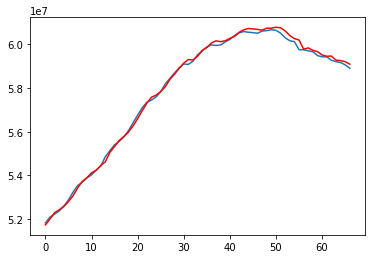

In [15]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
# load dataset
def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
se_ries = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Global%2C%20only%20Date%20and%20Infected%2C%20CSV%20formatted.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
se_ries.head()
month_index = se_ries.index.to_period('M')
# split into train and test sets
X = se_ries.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()